In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [20]:
df = pd.read_csv("Gold_data.csv",parse_dates=["date"])
df.head(6)
# note:Using Pandas parse_dates to Import DateTimes.
#One easy way to import data as DateTime is to use the parse_dates= argument.

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
5,2016-01-06,2617.70


In [21]:
df.set_index("date",inplace=True)
df.head(5)

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [22]:
series=df["price"].resample('D').sum()
series


# note: resampling
#When it comes to time series analysis, resampling is a critical technique that allows you to 
#flexibly define the resolution of the data you want. 
#You can either increase the frequency like converting 5-minute data into 1-minute data (upsample, increase in data points),
#or you can do the other way around (downsample, decrease in data points).

date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
               ...   
2021-12-17    4394.40
2021-12-18    4389.50
2021-12-19    4389.50
2021-12-20    4354.10
2021-12-21    4346.50
Freq: D, Name: price, Length: 2182, dtype: float64

In [23]:
ls *.png

 Volume in drive C is OS

File Not Found



 Volume Serial Number is 7EFD-E000

 Directory of C:\Users\ChiranjeeviAR\Documents\excelr project\project 1\stationary



<img src="Screenshot (132).png" width=1000px>

In [24]:
# link:https://youtu.be/R69TZFNEao4

In [25]:
# stationarity check:

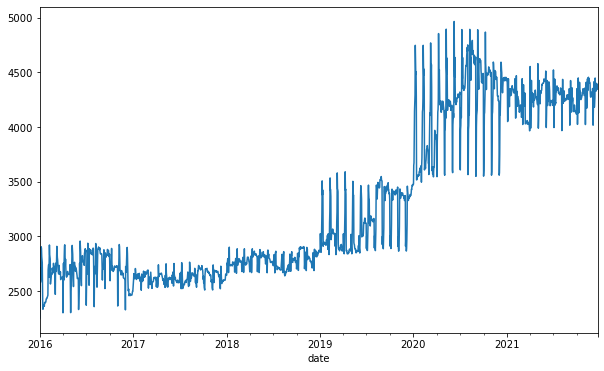

In [26]:
plt.figure(figsize=(10,6))
series.plot()
plt.show()

In [27]:
# trend is there.

In [28]:
# stationarity: mean,variance, auto correlation should not change with time
# if the data has trend or seasonality that infers that the data is  not stationary.

In [29]:
# checking whether data is stationary or not using Dickey -Fuller Test:
# ho: data is not stationary
# h1: data is stationary
from statsmodels.tsa.stattools import adfuller

In [30]:
test=adfuller(series)
test

(-0.30990365705047496,
 0.924089918907919,
 26,
 2155,
 {'1%': -3.4333881004322455,
  '5%': -2.8628821222065013,
  '10%': -2.5674844795732152},
 26123.460351151632)

In [31]:
print("p-value is:",test[1])

# p-value is >0.05 , i.e accept ho . therefore data is not stationary, we have to make it stationary

p-value is: 0.924089918907919


In [32]:
# lets remove the trend by taking difference
series1=series.diff()
series1.head(5)

date
2016-01-01       NaN
2016-01-02    201.90
2016-01-03    253.60
2016-01-04   -130.30
2016-01-05     19.95
Freq: D, Name: price, dtype: float64

In [33]:
series1.dropna(inplace=True)

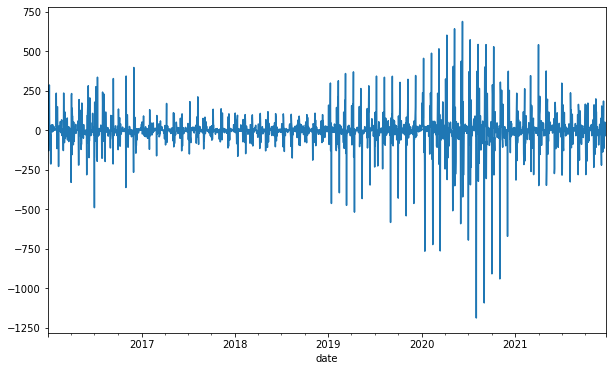

In [34]:
plt.figure(figsize=(10,6))
series1.plot()
plt.show()

# trend is removed, lets see through dickey-fuller test

In [35]:
test1=adfuller(series1)
print("p-value is:",test[1])

p-value is: 0.924089918907919


In [36]:
# seasonality checking:
df=pd.read_csv("Gold_data.csv",parse_dates=["date"])
df.head(2)

,date,price
0,2016-01-01,2252.6
1,2016-01-02,2454.5


In [37]:
df.set_index("date",inplace=True)
df.head(5)

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [38]:
series=df["price"].resample('M').sum()
series.head(5)

date
2016-01-31    77370.80
2016-02-29    77972.40
2016-03-31    83168.50
2016-04-30    80333.70
2016-05-31    83007.15
Freq: M, Name: price, dtype: float64

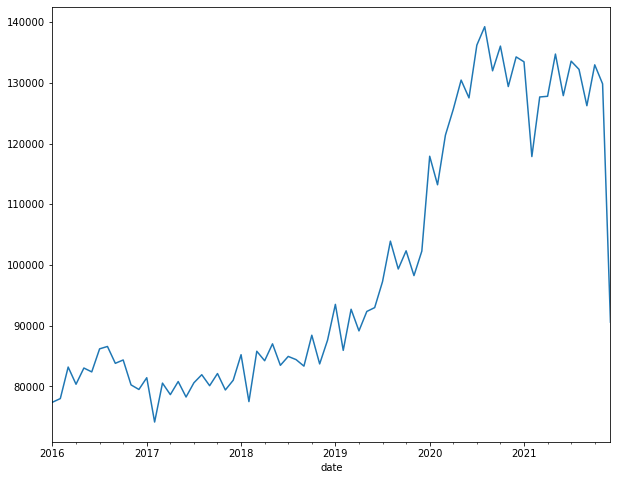

In [39]:
plt.figure(figsize=(10,8))
series.plot()
plt.show()

# looking at graph we can tell there is no seasonality
# lets see through test:

In [40]:
from statsmodels.tsa.stattools import adfuller
adf=adfuller(series)
print("p-value is:",adf[1])

# ho: data is not stationary
# h1: data is stationary

# from output: p-value is greater than 0.05, therefore accept ho, 
#it implies that there is some sort of seasonality

p-value is: 0.13929271243390007


In [41]:
#seasonality is there.

In [42]:
# lets remove:
series1=series.diff(periods=1)

<AxesSubplot:xlabel='date'>

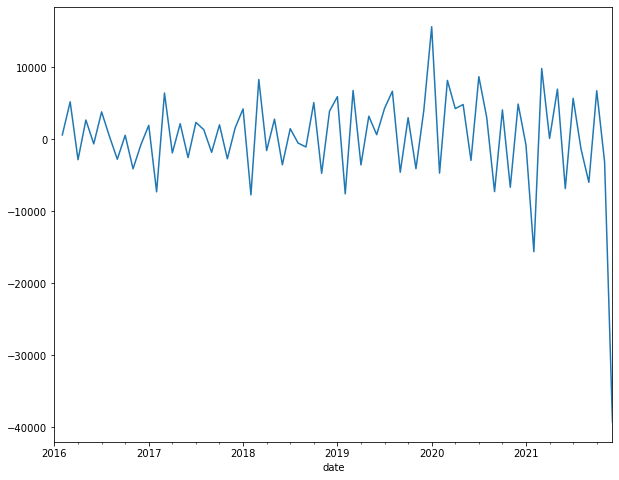

In [43]:
plt.figure(figsize=(10,8))
series1.plot()

# seasonality is not removed

In [44]:
# doing seasonal difference: i.e perios=12
series1=series.diff(periods=12)

<AxesSubplot:xlabel='date'>

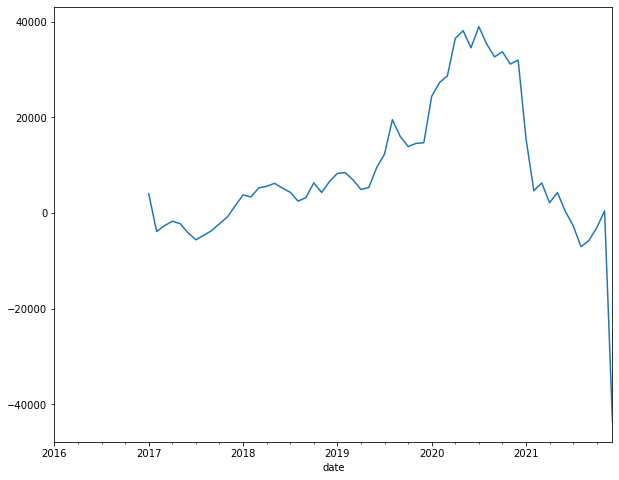

In [45]:
plt.figure(figsize=(10,8))
series1.plot()

In [46]:
# lets see through test:
adf1=adfuller(series1.dropna())
print("p-value is:",adf1[1])

p-value is: 0.3298509567389439


In [47]:
# cheking for variance:
df = pd.read_csv("Gold_data.csv",parse_dates=["date"])
df.head(6)

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
5,2016-01-06,2617.70


In [48]:
df.set_index("date", inplace=True)
df.head(5)

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [49]:
series=df["price"].resample('D').sum()
series


date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
               ...   
2021-12-17    4394.40
2021-12-18    4389.50
2021-12-19    4389.50
2021-12-20    4354.10
2021-12-21    4346.50
Freq: D, Name: price, Length: 2182, dtype: float64

<AxesSubplot:xlabel='date'>

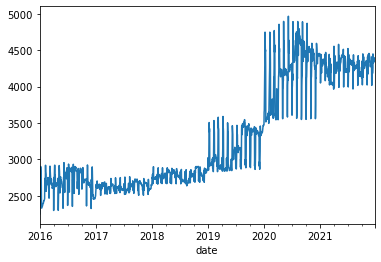

In [50]:
series.plot()

In [51]:
#checking:
adf=adfuller(df)
print("p-value is:",adf[1])

p-value is: 0.924089918907919


In [52]:
df1=np.log(df)
df1.head(5)

,price
date,
2016-01-01,7.719840
2016-01-02,7.805678
2016-01-03,7.904003
2016-01-04,7.854692
2016-01-05,7.862401


<AxesSubplot:xlabel='date'>

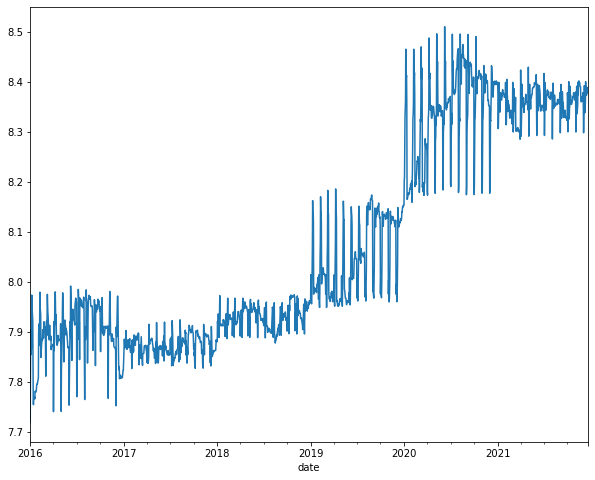

In [53]:
plt.figure(figsize=(10,8))
df1["price"].plot()

In [54]:
df2=df1.diff()
df2.head()

,price
date,
2016-01-01,NaN
2016-01-02,0.085838
2016-01-03,0.098324
2016-01-04,-0.049311
2016-01-05,0.007709


<AxesSubplot:xlabel='date'>

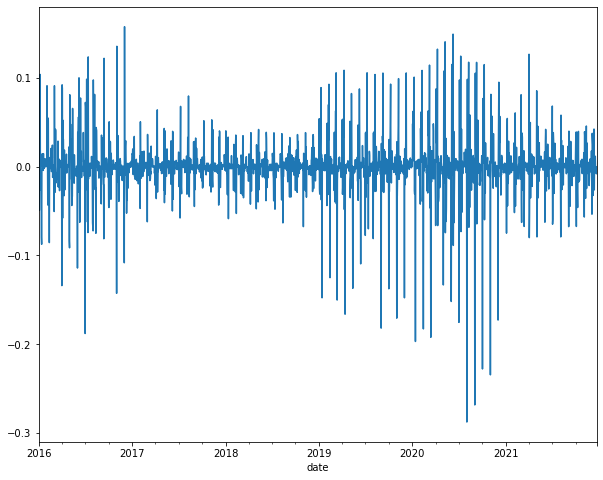

In [55]:
plt.figure(figsize=(10,8))
df2["price"].plot()

In [56]:
# checking:
adf1=adfuller(df2.dropna())
print("p-value is:",adf1[1])


# p-value is lesser than 0.05, therefore reject ho, it infers variance is stationary

p-value is: 0.0
